<a href="https://colab.research.google.com/github/kattens/Protein-Structure-Prediction-Using-Language-Models/blob/main/phase_3_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data prepration
for this part we focus on a dataset consisting of protein names, sequences, and the c alpha coordinates. we want to build a batch normalization layer to prepare our input base on similar 4letter name and different chains and their respective details regarding sequences and c alpha coordinates.

In [ ]:
pip install faiss-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [ ]:
# Define the PyTorch and CUDA version for compatibility
import torch
TORCH_VERSION = torch.__version__.split('+')[0]  # get the PyTorch version
CUDA_VERSION = torch.version.cuda.replace('.', '')  # format the CUDA version correctly

# Install torch-scatter
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH_VERSION}+cu{CUDA_VERSION}.html

# Install torch-sparse
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH_VERSION}+cu{CUDA_VERSION}.html

# Install torch-cluster for radius_graph
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH_VERSION}+cu{CUDA_VERSION}.html

# Install torch-spline-conv, if necessary for PointConv
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH_VERSION}+cu{CUDA_VERSION}.html

# Finally, install torch-geometric
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 28.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.3 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00


In [ ]:
pip install torch-geometric --upgrade


In [ ]:
pip install torch-geometric==specific.version.number


ERROR: Could not find a version that satisfies the requirement torch-geometric==specific.version.number (from versions: 0.1.1, 0.2.0, 0.3.0, 0.3.1, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.3.2, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.6.0, 1.6.1, 1.6.2, 1.6.3, 1.7.0, 1.7.1, 1.7.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.0.post1, 2.2.0, 2.3.0, 2.3.1, 2.4.0, 2.5.0)
ERROR: No matching distribution found for torch-geometric==specific.version.number


In [ ]:
# import the dataset csv file
csv_file = '/content/drive/MyDrive/newcsvforprotchains.csv'

#instead of dataframes, we use numpy arrays since its easier to manipulate for numerical computing
import numpy as np
import pandas as pd

df = pd.read_csv(csv_file)
df = df.dropna()
data_array = df.to_numpy()


In [ ]:
def parse_coordinates(coord_string):
    # Split the string into a list of floats
    coords = [float(x) for x in coord_string.split()]
    # Ensure the number of coordinates is a multiple of three
    if len(coords) % 3 != 0:
        raise ValueError("The number of coordinates is not a multiple of three.")
    # Group every three floats into a tuple to represent (x, y, z)
    return [(coords[i], coords[i+1], coords[i+2]) for i in range(0, len(coords), 3)]

# Use a try-except block to catch rows that may cause an error
def safe_parse_coordinates(row):
    try:
        return parse_coordinates(row['C-alpha Coordinates'])
    except ValueError as e:
        print(f"Error in row {row.name}: {e}")
        return None  # Or handle the error as appropriate

# Apply the safe function to the dataframe
df['Parsed Coordinates'] = df.apply(safe_parse_coordinates, axis=1)


Error in row 149: The number of coordinates is not a multiple of three.
Error in row 151: The number of coordinates is not a multiple of three.


In [ ]:
df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23..."
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0...."
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6..."
3,1H11_A.pdb,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,73.26 43.305 7.402 72.522 41.084 10.454 69.297...,"[(73.26, 43.305, 7.402), (72.522, 41.084, 10.4..."
5,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3..."
...,...,...,...,...
1576,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21..."
1577,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5..."
1578,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90..."
1585,1JUB_A.pdb,MLNTTFANAKFANPFMNASGVHCMTIEDLEELKASQAGAYITKSST...,-15.304 51.237 37.665 -12.277 51.083 35.375 -1...,"[(-15.304, 51.237, 37.665), (-12.277, 51.083, ..."


In [ ]:
import numpy as np

# Assuming df is your DataFrame and 'Parsed Coordinates' is a column in your DataFrame

# Flatten the list of tuples into a NumPy array for vectorized operations
coords_array = np.array([coord for coords in df['Parsed Coordinates'].dropna() for coord in coords])

# Calculate the mean and standard deviation for x, y, z
mean_values = np.mean(coords_array, axis=0)
std_values = np.std(coords_array, axis=0)

# Function to normalize the coordinates using vectorized operations
def normalize_coordinates(coords_tuple):
    if coords_tuple is None:  # Check if the input is None
        return None
    # Convert the list of tuples to a NumPy array
    coords = np.array(coords_tuple)
    # Normalize the coordinates
    normalized_coords = (coords - mean_values) / std_values
    # Convert back to list of tuples
    return list(map(tuple, normalized_coords))

# Apply the normalization to each row's coordinates
df['Normalized Coordinates'] = df['Parsed Coordinates'].apply(normalize_coordinates)


In [ ]:
df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates,Normalized Coordinates
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23...","[(0.6679325782836384, 0.23438756237169914, -0...."
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0....","[(-0.35319108263321614, 0.09634337541879658, -..."
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...","[(0.1631021334973197, -0.4053445576733752, 0.3..."
3,1H11_A.pdb,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,73.26 43.305 7.402 72.522 41.084 10.454 69.297...,"[(73.26, 43.305, 7.402), (72.522, 41.084, 10.4...","[(1.4608627584352365, 0.574728778640458, -0.66..."
5,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3...","[(-0.8707648808485281, -0.09949108561297146, -..."
...,...,...,...,...,...
1576,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21...","[(0.48905712463696105, -0.2409219069070549, -0..."
1577,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5...","[(0.890566458778403, 1.9820462326201393, -0.49..."
1578,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90...","[(0.42321646525382906, 0.7809717030143872, 1.2..."
1585,1JUB_A.pdb,MLNTTFANAKFANPFMNASGVHCMTIEDLEELKASQAGAYITKSST...,-15.304 51.237 37.665 -12.277 51.083 35.375 -1...,"[(-15.304, 51.237, 37.665), (-12.277, 51.083, ...","[(-1.3053194795190755, 0.8211763345509743, 0.0..."


#Sequence Tokenization and Preperation


In [ ]:
# Extract the pair identifier from the file name
df['pair_id'] = df['File Name'].str[:4]

# Create a new DataFrame to store pairs
paired_df = df[df.duplicated(subset=['pair_id'], keep=False)]

# Sort by 'pair_id' to ensure that pairs are adjacent
paired_df = paired_df.sort_values(by='pair_id').reset_index(drop=True)

In [ ]:
paired_df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates,Normalized Coordinates,pair_id
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23...","[(0.6679325782836384, 0.23438756237169914, -0....",1H0J
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0....","[(-0.35319108263321614, 0.09634337541879658, -...",1H0J
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...","[(0.1631021334973197, -0.4053445576733752, 0.3...",1H0J
3,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3...","[(-0.8707648808485281, -0.09949108561297146, -...",1H1A
4,1H1A_B.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,1.704 21.706 18.319 -0.901 24.305 19.238 -4.35...,"[(1.704, 21.706, 18.319), (-0.901, 24.305, 19....","[(-0.7740965503026112, -0.09635301159040945, -...",1H1A
...,...,...,...,...,...,...
1425,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21...","[(0.48905712463696105, -0.2409219069070549, -0...",1JTP
1426,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5...","[(0.890566458778403, 1.9820462326201393, -0.49...",1JU2
1427,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90...","[(0.42321646525382906, 0.7809717030143872, 1.2...",1JU2
1428,1JUB_A.pdb,MLNTTFANAKFANPFMNASGVHCMTIEDLEELKASQAGAYITKSST...,-15.304 51.237 37.665 -12.277 51.083 35.375 -1...,"[(-15.304, 51.237, 37.665), (-12.277, 51.083, ...","[(-1.3053194795190755, 0.8211763345509743, 0.0...",1JUB


In [ ]:
# Updated amino acid to token mapping with 'SEP' and '-' tokens
amino_acid_tokens = {aa: i+1 for i, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}
amino_acid_tokens['UNK'] = 21  # For unknown amino acids
amino_acid_tokens['SEP'] = 22  # New token for 'SEP'
amino_acid_tokens['-'] = 23    # New token for '-'

# Function to tokenize a single protein sequence
def tokenize_sequence(sequence, tokenizer):
    return [tokenizer.get(aa, tokenizer['UNK']) for aa in sequence]

# Applying the tokenization to the DataFrame
df['tokenized_sequence'] = df['Sequence'].apply(
    lambda sequence: tokenize_sequence(sequence, amino_acid_tokens)
)

# Optionally adding 'SEP' token to the end of each tokenized sequence
df['tokenized_sequence_with_sep'] = df['tokenized_sequence'].apply(
    lambda tokens: tokens + [amino_acid_tokens['SEP']]
)


In [ ]:
df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates,Normalized Coordinates,pair_id,tokenized_sequence,tokenized_sequence_with_sep
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23...","[(0.6679325782836384, 0.23438756237169914, -0....",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17..."
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0....","[(-0.35319108263321614, 0.09634337541879658, -...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17..."
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...","[(0.1631021334973197, -0.4053445576733752, 0.3...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17..."
3,1H11_A.pdb,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,73.26 43.305 7.402 72.522 41.084 10.454 69.297...,"[(73.26, 43.305, 7.402), (72.522, 41.084, 10.4...","[(1.4608627584352365, 0.574728778640458, -0.66...",1H11,"[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12..."
5,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3...","[(-0.8707648808485281, -0.09949108561297146, -...",1H1A,"[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ..."
...,...,...,...,...,...,...,...,...
1576,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21...","[(0.48905712463696105, -0.2409219069070549, -0...",1JTP,"[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1..."
1577,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5...","[(0.890566458778403, 1.9820462326201393, -0.49...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16..."
1578,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90...","[(0.42321646525382906, 0.7809717030143872, 1.2...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16..."
1585,1JUB_A.pdb,MLNTTFANAKFANPFMNASGVHCMTIEDLEELKASQAGAYITKSST...,-15.304 51.237 37.665 -12.277 51.083 35.375 -1...,"[(-15.304, 51.237, 37.665), (-12.277, 51.083, ...","[(-1.3053194795190755, 0.8211763345509743, 0.0...",1JUB,"[11, 10, 12, 17, 17, 5, 1, 12, 1, 9, 5, 1, 12,...","[11, 10, 12, 17, 17, 5, 1, 12, 1, 9, 5, 1, 12,..."


In [ ]:
# Function to directly convert space-separated coordinate string to a list of floats
def coords_to_float_list(coord_str):
    # Split the string on spaces, and convert each part to a float
    return [float(part) for part in coord_str.split()]

# Apply the function to each row in the 'C-alpha Coordinates' column to convert coordinates
df['coordinates_list'] = df['C-alpha Coordinates'].apply(coords_to_float_list)

# Optionally, format the original coordinate string with commas for clarity or other uses
df['formatted_coordinates'] = df['C-alpha Coordinates'].str.replace(' ', ', ')

# Check the result
print(df[['coordinates_list', 'formatted_coordinates']].head())


                                    coordinates_list  \
0  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
1  [15.18, 27.908, -3.171, 13.094, 28.367, -0.025...   
2  [31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...   
3  [73.26, 43.305, 7.402, 72.522, 41.084, 10.454,...   
5  [-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...   

                               formatted_coordinates  
0  47.873, 32.351, 21.457, 46.719, 29.304, 23.415...  
1  15.18, 27.908, -3.171, 13.094, 28.367, -0.025,...  
2  31.71, 11.761, 52.412, 31.514, 9.193, 49.625, ...  
3  73.26, 43.305, 7.402, 72.522, 41.084, 10.454, ...  
5  -1.391, 21.605, 15.29, 1.068, 24.346, 14.392, ...  


In [ ]:
df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates,Normalized Coordinates,pair_id,tokenized_sequence,tokenized_sequence_with_sep,coordinates_list,formatted_coordinates
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23...","[(0.6679325782836384, 0.23438756237169914, -0....",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","47.873, 32.351, 21.457, 46.719, 29.304, 23.415..."
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0....","[(-0.35319108263321614, 0.09634337541879658, -...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","15.18, 27.908, -3.171, 13.094, 28.367, -0.025,..."
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...","[(0.1631021334973197, -0.4053445576733752, 0.3...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","31.71, 11.761, 52.412, 31.514, 9.193, 49.625, ..."
3,1H11_A.pdb,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,73.26 43.305 7.402 72.522 41.084 10.454 69.297...,"[(73.26, 43.305, 7.402), (72.522, 41.084, 10.4...","[(1.4608627584352365, 0.574728778640458, -0.66...",1H11,"[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[73.26, 43.305, 7.402, 72.522, 41.084, 10.454,...","73.26, 43.305, 7.402, 72.522, 41.084, 10.454, ..."
5,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3...","[(-0.8707648808485281, -0.09949108561297146, -...",1H1A,"[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","-1.391, 21.605, 15.29, 1.068, 24.346, 14.392, ..."
...,...,...,...,...,...,...,...,...,...,...
1576,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21...","[(0.48905712463696105, -0.2409219069070549, -0...",1JTP,"[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69...","42.146, 17.053, 21.618, 39.429, 19.745, 21.695..."
1577,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5...","[(0.890566458778403, 1.9820462326201393, -0.49...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[55.001, 88.6, 14.574, 56.504, 91.499, 16.515,...","55.001, 88.6, 14.574, 56.504, 91.499, 16.515, ..."
1578,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90...","[(0.42321646525382906, 0.7809717030143872, 1.2...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[40.038, 49.943, 89.754, 43.795, 49.568, 90.10...","40.038, 49.943, 89.754, 43.795, 49.568, 90.105..."
1585,1JUB_A.pdb,MLNTTFANAKFANPFMNASGVHCMTIEDLEELKASQAGAYITKSST...,-15.304 51.237 37.665 -12.277 51.083 35.375 -1...,"[(-15.304, 51.237, 37.665), (-12.277, 51.083, ...","[(-1.3053194795190755, 0.8211763345509743, 0.0...",1JUB,"[11, 10, 12, 17, 17, 5, 1, 12, 1, 9, 5, 1, 12,...","[11, 10, 12, 17, 17, 5, 1, 12, 1, 9, 5, 1, 12,...","[

In [ ]:
# Function to check the 1:3 ratio of amino acids to coordinates
def check_ratio(sequence, coordinates_list):
    num_amino_acids = len(sequence)  # Number of amino acids
    num_coordinates = len(coordinates_list)  # Total number of coordinate elements
    # Check if the total number of coordinates is exactly three times the number of amino acids
    return num_coordinates == num_amino_acids * 3

# Apply the check to each row and store the result in a new column
df['ratio_check'] = df.apply(lambda x: check_ratio(x['Sequence'], x['coordinates_list']), axis=1)

# Find rows where the ratio check failed
failed_ratio_check = df[~df['ratio_check']]

# Print out the details of rows with failed checks, if any, including counts
if not failed_ratio_check.empty:
    print("Rows with failed ratio check:")
    # Safely adding details on the failed checks
    failed_ratio_check = failed_ratio_check.copy()
    failed_ratio_check['num_amino_acids'] = failed_ratio_check['Sequence'].apply(len)
    failed_ratio_check['num_coordinates'] = failed_ratio_check['coordinates_list'].apply(len)
    print(failed_ratio_check[['Sequence', 'C-alpha Coordinates', 'num_amino_acids', 'num_coordinates']])
else:
    print("All rows passed the ratio check.")

Rows with failed ratio check:
                                              Sequence C-alpha Coordinates  \
149  AGRRALIVLAHSERTSFNYAMKEAAAAALKKKGWEVVESDLYAMNF...          -33479.114   
151  AGRRALIVLAHSERTSFNYAMKEAAAAALKKKGWEVVESDLYAMNF...          -29599.479   

     num_amino_acids  num_coordinates  
149              273                1  
151              273                1  


In [ ]:
# Identify rows where the ratio check failed
failed_ratio_check = df[~df['ratio_check']]

# Print out the details of rows with failed checks, if any, including counts
if not failed_ratio_check.empty:
    failed_ratio_check['num_amino_acids'] = failed_ratio_check['Sequence'].apply(len)
    failed_ratio_check['num_coordinates'] = failed_ratio_check['coordinates_list'].apply(len)
    print("Rows with failed ratio check:")
    print(failed_ratio_check[['Sequence', 'C-alpha Coordinates', 'num_amino_acids', 'num_coordinates']])
else:
    print("All rows passed the ratio check.")

# Remove rows that failed the ratio check from the original DataFrame permanently
df = df[df['ratio_check']].drop(columns=['ratio_check'])

# Verify removal
print("Updated DataFrame after removing failed rows:")
print(df.head())

Rows with failed ratio check:
                                              Sequence C-alpha Coordinates  \
149  AGRRALIVLAHSERTSFNYAMKEAAAAALKKKGWEVVESDLYAMNF...          -33479.114   
151  AGRRALIVLAHSERTSFNYAMKEAAAAALKKKGWEVVESDLYAMNF...          -29599.479   

     num_amino_acids  num_coordinates  
149              273                1  
151              273                1  
Updated DataFrame after removing failed rows:


<ipython-input-19-2642bdf3a5b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_ratio_check['num_amino_acids'] = failed_ratio_check['Sequence'].apply(len)
<ipython-input-19-2642bdf3a5b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_ratio_check['num_coordinates'] = failed_ratio_check['coordinates_list'].apply(len)


    File Name                                           Sequence  \
0  1H0J_A.pdb  LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...   
1  1H0J_B.pdb  LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...   
2  1H0J_C.pdb  LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...   
3  1H11_A.pdb  SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...   
5  1H1A_A.pdb  XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...   

                                 C-alpha Coordinates  \
0  47.873 32.351 21.457 46.719 29.304 23.415 43.0...   
1  15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...   
2  31.71 11.761 52.412 31.514 9.193 49.625 29.806...   
3  73.26 43.305 7.402 72.522 41.084 10.454 69.297...   
5  -1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...   

                                  Parsed Coordinates  \
0  [(47.873, 32.351, 21.457), (46.719, 29.304, 23...   
1  [(15.18, 27.908, -3.171), (13.094, 28.367, -0....   
2  [(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...   
3  [(73.26, 43.305, 7.402), (7

In [ ]:
df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates,Normalized Coordinates,pair_id,tokenized_sequence,tokenized_sequence_with_sep,coordinates_list,formatted_coordinates
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23...","[(0.6679325782836384, 0.23438756237169914, -0....",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","47.873, 32.351, 21.457, 46.719, 29.304, 23.415..."
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0....","[(-0.35319108263321614, 0.09634337541879658, -...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","15.18, 27.908, -3.171, 13.094, 28.367, -0.025,..."
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...","[(0.1631021334973197, -0.4053445576733752, 0.3...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","31.71, 11.761, 52.412, 31.514, 9.193, 49.625, ..."
3,1H11_A.pdb,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,73.26 43.305 7.402 72.522 41.084 10.454 69.297...,"[(73.26, 43.305, 7.402), (72.522, 41.084, 10.4...","[(1.4608627584352365, 0.574728778640458, -0.66...",1H11,"[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[73.26, 43.305, 7.402, 72.522, 41.084, 10.454,...","73.26, 43.305, 7.402, 72.522, 41.084, 10.454, ..."
5,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3...","[(-0.8707648808485281, -0.09949108561297146, -...",1H1A,"[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","-1.391, 21.605, 15.29, 1.068, 24.346, 14.392, ..."
...,...,...,...,...,...,...,...,...,...,...
1576,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21...","[(0.48905712463696105, -0.2409219069070549, -0...",1JTP,"[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69...","42.146, 17.053, 21.618, 39.429, 19.745, 21.695..."
1577,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5...","[(0.890566458778403, 1.9820462326201393, -0.49...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[55.001, 88.6, 14.574, 56.504, 91.499, 16.515,...","55.001, 88.6, 14.574, 56.504, 91.499, 16.515, ..."
1578,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90...","[(0.42321646525382906, 0.7809717030143872, 1.2...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[40.038, 49.943, 89.754, 43.795, 49.568, 90.10...","40.038, 49.943, 89.754, 43.795, 49.568, 90.105..."
1585,1JUB_A.pdb,MLNTTFANAKFANPFMNASGVHCMTIEDLEELKASQAGAYITKSST...,-15.304 51.237 37.665 -12.277 51.083 35.375 -1...,"[(-15.304, 51.237, 37.665), (-12.277, 51.083, ...","[(-1.3053194795190755, 0.8211763345509743, 0.0...",1JUB,"[11, 10, 12, 17, 17, 5, 1, 12, 1, 9, 5, 1, 12,...","[11, 10, 12, 17, 17, 5, 1, 12, 1, 9, 5, 1, 12,...","[

comparing proteins:

    Calculating Closest Amino Acids: The calculate_top_20_pairs function computes the top 20 closest amino acids between two sets of coordinates (representing two proteins) using FAISS's IndexFlatL2 for L2 distance (Euclidean distance). It cleverly searches for the top 21 closest pairs to exclude the self-match (the same amino acid), then returns the indices of the top 20 actual closest pairs.

    Masking Sequences: The mask_sequence function creates a masked version of a protein sequence based on the indices of the top 20 closest amino acids. This effectively highlights the amino acids in one protein that are closest to those in another protein, with all other positions masked out.

    Generating Pairwise Comparisons: The generate_pairs function iterates over all unique pairs of proteins within a group, using the combinations method from the itertools library. For each pair, it calculates the top 20 closest amino acids in both directions (from the first protein to the second and vice versa) and creates masked sequences to represent these interactions.

    Compiling Results: The process generates a DataFrame (paired_df) that aggregates the pairwise comparison data, including the pair identifiers, masked sequences, and original coordinate lists for both proteins in each pair.

    Efficiency and Scalability: While the approach is systematic and thorough, executing this process for a large set of proteins (e.g., 1500 proteins, leading to a significant number of pairwise comparisons) will be computationally intensive. Each pairwise comparison involves an exhaustive search, which, although accurate, might demand substantial computational resources.

    Practical Application: This method is particularly useful for detailed analysis of spatial relationships between proteins at the amino acid level. It could provide insights into potential interaction sites, functional relationships, or structural similarities between proteins.

In [ ]:
import pandas as pd
import numpy as np
import faiss
from itertools import combinations

# Function to calculate the top 20 closest amino acids between two sets of coordinates
def calculate_top_20_pairs(coords1, coords2):
    coords1_np = np.array(coords1).reshape(-1, 3).astype('float32')
    coords2_np = np.array(coords2).reshape(-1, 3).astype('float32')
    index = faiss.IndexFlatL2(3)  # Using L2 distance for 3D coordinates
    index.add(coords1_np)
    distances, indices = index.search(coords2_np, 21)  # Searching for top 21 to exclude self-matches
    return indices[:, 1:]  # Exclude the self-match at index 0

# Function to create a masked sequence based on indices
def mask_sequence(sequence, indices):
    masked_sequence = ['-' for _ in sequence]  # Initialize all positions as masked
    for index_set in indices:
        for idx in index_set:
            if 0 <= idx < len(sequence):
                masked_sequence[idx] = sequence[idx]  # Unmask the top 20 positions
    return ''.join(masked_sequence)

# Generate all unique pairs for each protein group
def generate_pairs(group):
    paired_data = []
    for (idx1, row1), (idx2, row2) in combinations(group.iterrows(), 2):
        # Calculate top 20 closest pairs for each direction
        top_20_indices_1 = calculate_top_20_pairs(row1['coordinates_list'], row2['coordinates_list'])
        top_20_indices_2 = calculate_top_20_pairs(row2['coordinates_list'], row1['coordinates_list'])

        # Create masked sequences based on top 20 positions
        masked_seq_1 = mask_sequence(row1['Sequence'], top_20_indices_1)
        masked_seq_2 = mask_sequence(row2['Sequence'], top_20_indices_2)

        # Append data with clear naming for pair interactions
        paired_data.append({'pair_id': f"{row1['File Name']}-{row2['File Name']}",
                            'masked_sequence_A': masked_seq_1,  # Masked sequence of chain A
                            'masked_sequence_B': masked_seq_2,  # Masked sequence of chain B
                            'coordinates_list_A': row1['coordinates_list'],  # Coordinates of chain A
                            'coordinates_list_B': row2['coordinates_list']}) # Coordinates of chain B
    return paired_data

# Assuming df is your original DataFrame
paired_df = pd.DataFrame()

# Loop over each group and append the processed pairs to the paired_df
for pair_id, group in df.groupby('pair_id'):
    pairs = generate_pairs(group)
    paired_df = paired_df.append(pairs, ignore_index=True)

# Display the new DataFrame
print(paired_df.head())  # Displaying just the head for brevity


<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and wil

                 pair_id                                  masked_sequence_A  \
0  1H0J_A.pdb-1H0J_B.pdb  ---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...   
1  1H0J_A.pdb-1H0J_C.pdb  --CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...   
2  1H0J_B.pdb-1H0J_C.pdb  -----LVP--------------KMFMVATPKVPVKR------PKSS...   
3  1H1A_A.pdb-1H1A_B.pdb  XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...   
4  1H1I_A.pdb-1H1I_B.pdb  ----------------------------------------------...   

                                   masked_sequence_B  \
0  ---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...   
1  ----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...   
2  ----KLV---------------KMFMVATPKVPVKR------PKSS...   
3  XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...   
4  S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...   

                                  coordinates_list_A  \
0  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
1  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
2  [15.18, 27.908, -

<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paired_df = paired_df.append(pairs, ignore_index=True)
<ipython-input-21-21fdc7addb49>:50: FutureWarning: The frame.append method is deprecated and wil

In [ ]:
paired_df#['masked_sequence']

,pair_id,masked_sequence_A,masked_sequence_B,coordinates_list_A,coordinates_list_B
0,1H0J_A.pdb-1H0J_B.pdb,---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...,---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025..."
1,1H0J_A.pdb-1H0J_C.pdb,--CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...,----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,..."
2,1H0J_B.pdb-1H0J_C.pdb,-----LVP--------------KMFMVATPKVPVKR------PKSS...,----KLV---------------KMFMVATPKVPVKR------PKSS...,"[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,..."
3,1H1A_A.pdb-1H1A_B.pdb,XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...,XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...,"[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","[1.704, 21.706, 18.319, -0.901, 24.305, 19.238..."
4,1H1I_A.pdb-1H1I_B.pdb,----------------------------------------------...,S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...,"[65.645, 40.726, 70.958, 67.22, 39.56, 67.636,...","[67.215, 3.653, 5.427, 68.427, 7.123, 4.339, 7..."
...,...,...,...,...,...
2869,1JTP_B.pdb-1JTP_L.pdb,-------------------------------Y-----------ERE...,KVYGRCE----------------------CAAKFESNFNTHATNRN...,"[66.777, 49.682, 33.269, 66.004, 50.149, 29.54...","[22.499, 46.504, 21.166, 24.861, 44.681, 23.45..."
2870,1JTP_B.pdb-1JTP_M.pdb,DV-----------------------GYTIGPYC-------------...,--------------------R---------A--FE--------NRN...,"[66.777, 49.682, 33.269, 66.004, 50.149, 29.54...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69..."
2871,1JTP_L.pdb-1JTP_M.pdb,KVYGRCEL---------------S-GN-VCAAKFESNFNTHATNRN...,KVYGRCELAAA-------N----SLGN-VCAAKFESNFNTHATNR-...,"[22.499, 46.504, 21.166, 24.861, 44.681, 23.45...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69..."
2872,1JU2_A.pdb-1JU2_B.pdb,----------------------------------------------...,----------------------------------------------...,"[55.001, 88.6, 14.574, 56.504, 91.499, 16.515,...","[40.038, 49.943, 89.754, 43.795, 49.568, 90.10..."


In [ ]:
df.columns

Index(['File Name', 'Sequence', 'C-alpha Coordinates', 'Parsed Coordinates',
       'Normalized Coordinates', 'pair_id', 'tokenized_sequence',
       'tokenized_sequence_with_sep', 'coordinates_list',
       'formatted_coordinates'],
      dtype='object')

In [ ]:
# Assuming 'paired_df' is your DataFrame and it already has 'masked_sequence_A' and 'masked_sequence_B' columns

# The amino_acid_tokens dictionary is provided, including the [SEP] token
amino_acid_tokens = {
    '[CLS]': 24,  # Added [CLS] token
    '[SEP]': 25,  # Added [SEP] token
    '[PAD]': 26,  # Added [PAD] token
    '[MASK]': 27,  # Added [MASK] token
    'A': 1, 'R': 2, 'N': 3, 'D': 4, 'C': 5, 'E': 6, 'F': 7, 'G': 8, 'H': 9, 'I': 10,
    'K': 11, 'L': 12, 'M': 13, 'P': 14, 'Q': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20,
    'UNK': 21,  # Ensure this is used for unknown amino acids
    '-': 23  # Assuming this is used for padding
}

# Function to tokenize a single protein sequence with the possibility of unknown amino acids
def tokenize_sequence(sequence, tokenizer):
    return [tokenizer.get(aa, tokenizer['UNK']) for aa in sequence]

# Apply tokenization to the 'masked_sequence_A' and 'masked_sequence_B' columns in paired_df
paired_df['tokenized_sequence_A'] = paired_df['masked_sequence_A'].apply(
    lambda sequence: tokenize_sequence(sequence, amino_acid_tokens)
)
paired_df['tokenized_sequence_B'] = paired_df['masked_sequence_B'].apply(
    lambda sequence: tokenize_sequence(sequence, amino_acid_tokens)
)

# Corrected portion: Optionally, add '[SEP]' token explicitly at the end of each tokenized sequence
paired_df['tokenized_sequence_A_with_sep'] = paired_df['tokenized_sequence_A'].apply(
    lambda tokens: tokens + [amino_acid_tokens['[SEP]']]  # Use the correct key for the [SEP] token
)
paired_df['tokenized_sequence_B_with_sep'] = paired_df['tokenized_sequence_B'].apply(
    lambda tokens: tokens + [amino_acid_tokens['[SEP]']]  # Use the correct key for the [SEP] token
)

# This is an optional step to show the first few rows of your DataFrame to verify the changes
print(paired_df[['masked_sequence_A', 'tokenized_sequence_A', 'tokenized_sequence_A_with_sep', 'masked_sequence_B', 'tokenized_sequence_B', 'tokenized_sequence_B_with_sep']].head())


                                   masked_sequence_A  \
0  ---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...   
1  --CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...   
2  -----LVP--------------KMFMVATPKVPVKR------PKSS...   
3  XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...   
4  ----------------------------------------------...   

                                tokenized_sequence_A  \
0  [23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...   
1  [23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...   
2  [23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...   
3  [21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...   
4  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...   

                       tokenized_sequence_A_with_sep  \
0  [23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...   
1  [23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...   
2  [23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...   
3  [21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...   
4  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23

In [ ]:
paired_df

,pair_id,masked_sequence_A,masked_sequence_B,coordinates_list_A,coordinates_list_B,tokenized_sequence_A,tokenized_sequence_B,tokenized_sequence_A_with_sep,tokenized_sequence_B_with_sep
0,1H0J_A.pdb-1H0J_B.pdb,---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...,---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,..."
1,1H0J_A.pdb-1H0J_C.pdb,--CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...,----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1..."
2,1H0J_B.pdb-1H0J_C.pdb,-----LVP--------------KMFMVATPKVPVKR------PKSS...,----KLV---------------KMFMVATPKVPVKR------PKSS...,"[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2..."
3,1H1A_A.pdb-1H1A_B.pdb,XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...,XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...,"[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","[1.704, 21.706, 18.319, -0.901, 24.305, 19.238...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8..."
4,1H1I_A.pdb-1H1I_B.pdb,----------------------------------------------...,S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...,"[65.645, 40.726, 70.958, 67.22, 39.56, 67.636,...","[67.215, 3.653, 5.427, 68.427, 7.123, 4.339, 7...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[16, 23, 23, 23, 18, 6, 4, 1, 14, 4, 9, 18, 2,...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[16, 23, 23, 23, 18, 6, 4, 1, 14, 4, 9, 18, 2,..."
...,...,...,...,...,...,...,...,...,...
2869,1JTP_B.pdb-1JTP_L.pdb,-------------------------------Y-----------ERE...,KVYGRCE----------------------CAAKFESNFNTHATNRN...,"[66.777, 49.682, 33.269, 66.004, 50.149, 29.54...","[22.499, 46.504, 21.166, 24.861, 44.681, 23.45...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[11, 18, 20, 8, 2, 5, 6, 23, 23, 23, 23, 23, 2...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[11, 18, 20, 8, 2, 5, 6, 23, 23, 23, 23, 23, 2..."
2870,1JTP_B.pdb-1JTP_M.pdb,DV-----------------------GYTIGPYC-------------...,--------------------R---------A--FE--------NRN...,"[66.777, 49.682, 33.269, 66.004, 50.149, 29.54...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69...","[4, 18, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[4, 18, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2..."
2871,1JTP_L.pdb-1JTP_M.pdb,KVYGRCEL---------------S-GN-VCAAKFESNFNTHATNRN...,KVYGRCELAAA-------N----SLGN-VCAAKFESNFNTHATNR-...,"[22.499, 46.504, 21.166, 24.861, 44.681, 23.45...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69...","[11, 18, 20, 8, 2, 5, 6, 12, 23, 23, 23, 23, 2...","[11, 18, 20, 8, 2, 5, 6, 12, 1, 1, 1, 23, 23, ...","[11, 18, 20, 8, 2, 5, 6, 12, 23, 23, 23, 23, 2...","[11, 18, 20, 8, 2, 5, 6, 12, 1, 1, 1, 23, 23, ..."
2872,1JU2_A.pdb-1JU2_B.pdb,----------------------------------------------...,----------------------------------------------...,"[55.001, 88.6, 14.574, 56.504, 91.499, 16.515,...","[40.038, 49.943, 89.754, 43.795, 49.568, 90.10...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2

In [ ]:
paired_df.columns

Index(['pair_id', 'masked_sequence_A', 'masked_sequence_B',
       'coordinates_list_A', 'coordinates_list_B', 'tokenized_sequence_A',
       'tokenized_sequence_B', 'tokenized_sequence_A_with_sep',
       'tokenized_sequence_B_with_sep'],
      dtype='object')

In [ ]:
# Assuming 'File Name' in 'df' holds the file names and 'Sequence' the sequences.
# Create a dictionary for mapping file names to sequences.
file_to_sequence = dict(zip(df['File Name'], df['Sequence']))
file_to_tokenized_sequence = dict(zip(df['File Name'], df['tokenized_sequence']))

# Now, split the 'pair_id' in 'paired_df' to extract the file names for A and B.
paired_df['File_Name_A'], paired_df['File_Name_B'] = zip(*paired_df['pair_id'].apply(lambda x: x.split('-')))

# Use the dictionary to map file names to sequences for both A and B.
paired_df['Sequence_A'] = paired_df['File_Name_A'].map(file_to_sequence)
paired_df['Sequence_B'] = paired_df['File_Name_B'].map(file_to_sequence)

# Similarly, map the tokenized sequences.
paired_df['Tokenized_Sequence_A'] = paired_df['File_Name_A'].map(file_to_tokenized_sequence)
paired_df['Tokenized_Sequence_B'] = paired_df['File_Name_B'].map(file_to_tokenized_sequence)

# Display the updated DataFrame
print(paired_df.head())


                 pair_id                                  masked_sequence_A  \
0  1H0J_A.pdb-1H0J_B.pdb  ---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...   
1  1H0J_A.pdb-1H0J_C.pdb  --CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...   
2  1H0J_B.pdb-1H0J_C.pdb  -----LVP--------------KMFMVATPKVPVKR------PKSS...   
3  1H1A_A.pdb-1H1A_B.pdb  XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...   
4  1H1I_A.pdb-1H1I_B.pdb  ----------------------------------------------...   

                                   masked_sequence_B  \
0  ---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...   
1  ----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...   
2  ----KLV---------------KMFMVATPKVPVKR------PKSS...   
3  XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...   
4  S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...   

                                  coordinates_list_A  \
0  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
1  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
2  [15.18, 27.908, -

In [ ]:
paired_df

,pair_id,masked_sequence_A,masked_sequence_B,coordinates_list_A,coordinates_list_B,tokenized_sequence_A,tokenized_sequence_B,tokenized_sequence_A_with_sep,tokenized_sequence_B_with_sep,File_Name_A,File_Name_B,Sequence_A,Sequence_B,Tokenized_Sequence_A,Tokenized_Sequence_B
0,1H0J_A.pdb-1H0J_B.pdb,---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...,---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,...",1H0J_A.pdb,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17..."
1,1H0J_A.pdb-1H0J_C.pdb,--CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...,----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1...",1H0J_A.pdb,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17..."
2,1H0J_B.pdb-1H0J_C.pdb,-----LVP--------------KMFMVATPKVPVKR------PKSS...,----KLV---------------KMFMVATPKVPVKR------PKSS...,"[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2...",1H0J_B.pdb,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17..."
3,1H1A_A.pdb-1H1A_B.pdb,XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...,XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...,"[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","[1.704, 21.706, 18.319, -0.901, 24.305, 19.238...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...",1H1A_A.pdb,1H1A_B.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,"[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ..."
4,1H1I_A.pdb-1H1I_B.pdb,----------------------------------------------...,S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...,"[65.645, 40.726, 70.958, 67.22, 39.56, 67.636,...","[67.215, 3.653, 5.427, 68.427, 7.123, 4.339, 7...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[16, 23, 23, 23, 18, 6, 4, 1, 14, 4, 9, 18, 2,...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[16, 23, 23, 23, 18, 6, 4, 1, 14, 4, 9, 18, 2,...",1H1I_A.pdb,1H1I_B.pdb,SSLIVEDAPDHVRPYVIRHYSHARAVTVDTQLYRFYVTGPSSGYAF...,SSLIVEDAPDHVRPYVIRHYSHARAVTVDTQLYRFYVTGPSSGYAF...,"[16, 16, 10, 8, 18, 4, 3, 1, 13, 3, 7, 18, 15,...","[16, 16, 10, 8, 18, 4, 3, 1, 13, 3, 7, 18, 15,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,1JTP_B.pdb-1JTP_L.pdb,-------------------------------Y-----------ERE...,KVYGRCE----------------------CAAKFESNFNTHATNRN...,"[66.777, 49.682, 33.269, 66.004, 50.149, 29.54...","[22.499, 46.504, 21.166, 24.861, 44.681, 23.45...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[11, 18, 20, 8, 2, 5, 6, 23, 23, 23, 23, 23, 2...","[23, 23, 23, 23, 

In [ ]:
# This function should already be defined in your code
# def tokenize_sequence(sequence, tokenizer):
#     return [tokenizer.get(aa, tokenizer['UNK']) for aa in sequence]

# Let's assume 'amino_acid_tokens' is your tokenizer dictionary
# Tokenize the masked sequences
paired_df['Tokenized_Masked_Sequence_A'] = paired_df['masked_sequence_A'].apply(
    lambda seq: tokenize_sequence(seq, amino_acid_tokens) if pd.notnull(seq) else []
)
paired_df['Tokenized_Masked_Sequence_B'] = paired_df['masked_sequence_B'].apply(
    lambda seq: tokenize_sequence(seq, amino_acid_tokens) if pd.notnull(seq) else []
)

# Define a function to sum the token values for each position in the sequence
def sum_token_values(tokens1, tokens2):
    # Ensure both token lists are the same length
    length = min(len(tokens1), len(tokens2))
    return [tokens1[i] + tokens2[i] for i in range(length)]

# Apply the sum function to each row for sequences A and B
paired_df['Tokenized_Sum_A'] = paired_df.apply(
    lambda row: sum_token_values(row['Tokenized_Sequence_A'], row['Tokenized_Masked_Sequence_A']), axis=1
)
paired_df['Tokenized_Sum_B'] = paired_df.apply(
    lambda row: sum_token_values(row['Tokenized_Sequence_B'], row['Tokenized_Masked_Sequence_B']), axis=1
)

# Display the updated DataFrame
print(paired_df.head())


                 pair_id                                  masked_sequence_A  \
0  1H0J_A.pdb-1H0J_B.pdb  ---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...   
1  1H0J_A.pdb-1H0J_C.pdb  --CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...   
2  1H0J_B.pdb-1H0J_C.pdb  -----LVP--------------KMFMVATPKVPVKR------PKSS...   
3  1H1A_A.pdb-1H1A_B.pdb  XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...   
4  1H1I_A.pdb-1H1I_B.pdb  ----------------------------------------------...   

                                   masked_sequence_B  \
0  ---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...   
1  ----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...   
2  ----KLV---------------KMFMVATPKVPVKR------PKSS...   
3  XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...   
4  S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...   

                                  coordinates_list_A  \
0  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
1  [47.873, 32.351, 21.457, 46.719, 29.304, 23.41...   
2  [15.18, 27.908, -

In [ ]:
paired_df

,pair_id,masked_sequence_A,masked_sequence_B,coordinates_list_A,coordinates_list_B,tokenized_sequence_A,tokenized_sequence_B,tokenized_sequence_A_with_sep,tokenized_sequence_B_with_sep,File_Name_A,File_Name_B,Sequence_A,Sequence_B,Tokenized_Sequence_A,Tokenized_Sequence_B,Tokenized_Masked_Sequence_A,Tokenized_Masked_Sequence_B,Tokenized_Sum_A,Tokenized_Sum_B
0,1H0J_A.pdb-1H0J_B.pdb,---NKLVP-F------GK---YKMFMVATPKVPVKRGCIDVCPKSS...,---NKLVP-FY-----GK-L-YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,...",1H0J_A.pdb,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 23, 23,...","[23, 23, 23, 3, 11, 12, 18, 14, 23, 7, 20, 23,...","[33, 32, 25, 15, 20, 22, 36, 27, 33, 12, 43, 3...","[33, 32, 25, 15, 20, 22, 36, 27, 33, 12, 40, 3..."
1,1H0J_A.pdb-1H0J_C.pdb,--CNKLVPLFYK----------KMFMVATPKVPVKR--------SS...,----KLV----K-CPAGK---YKMFMVATPKVPVKRGCIDVCPKSS...,"[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1...",1H0J_A.pdb,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[23, 23, 5, 3, 11, 12, 18, 14, 12, 7, 20, 11, ...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 1...","[33, 32, 7, 15, 20, 22, 36, 27, 22, 12, 40, 20...","[33, 32, 25, 35, 20, 22, 36, 36, 33, 28, 43, 2..."
2,1H0J_B.pdb-1H0J_C.pdb,-----LVP--------------KMFMVATPKVPVKR------PKSS...,----KLV---------------KMFMVATPKVPVKR------PKSS...,"[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2...",1H0J_B.pdb,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[23, 23, 23, 23, 23, 12, 18, 14, 23, 23, 23, 2...","[23, 23, 23, 23, 11, 12, 18, 23, 23, 23, 23, 2...","[33, 32, 25, 35, 32, 22, 36, 27, 33, 28, 43, 3...","[33, 32, 25, 35, 20, 22, 36, 36, 33, 28, 43, 3..."
3,1H1A_A.pdb-1H1A_B.pdb,XTLTSSATGTHNGYYYSF---G--NIRFNLESGGQYSVT-------...,XTLTSSATGTHNGYYYSFW--G--NIRFNLESGGQYSVT-------...,"[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","[1.704, 21.706, 18.319, -0.901, 24.305, 19.238...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...",1H1A_A.pdb,1H1A_B.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,"[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[21, 17, 12, 17, 16, 16, 1, 17, 8, 17, 9, 3, 8...","[42, 34, 22, 34, 32, 32, 2, 34, 14, 34, 16, 15...","[42, 34, 22, 34, 32, 32, 2, 34, 14, 34, 16, 15..."
4,1H1I_A.pdb-1H1I_B.pdb,----------------------------------------------...,S---VEDAPDHVRP-------HARAVTV---------TGPSSGYA-...,"[65.645, 40.726, 70.958, 67.22, 39

#Coordinates Tokenization and Preperation


For this part, we will use pytorch_geometric for converting the data into a graph format to be easilly processed and encoded for the final transformer model.

Steps:
Normalizing the coordinates.

Creating a unified graph that represents both intra-chain and inter-chain interactions.

Encoding the coordinates using a PyTorch Geometric layer.

Preparing the encoded coordinates to be combined with your tokenized sequence data.

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric


In [ ]:
print(df.columns)

Index(['File Name', 'Sequence', 'C-alpha Coordinates', 'Parsed Coordinates',
       'Normalized Coordinates', 'pair_id', 'tokenized_sequence',
       'tokenized_sequence_with_sep', 'coordinates_list',
       'formatted_coordinates'],
      dtype='object')


In [ ]:
df_paired.columns

NameError: name 'df_paired' is not defined

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import radius_graph

# Define the radius within which nodes will be connected
radius = 10  # This is an arbitrary value, adjust based on your data and needs

# Placeholder list to store the graph data objects
graphs = []

# Iterate over the rows in the dataframe
for index, row in df.iterrows():
    # Get the normalized coordinates for the row
    coords = row['Normalized Coordinates']
    if coords is not None:  # Make sure there are coordinates to process
        # Convert the list of tuples into a tensor
        node_features = torch.tensor(coords, dtype=torch.float)
        # Create the edge index using the radius graph
        edge_index = radius_graph(node_features, r=radius, loop=False)
        # Create a graph data object
        graph_data = Data(x=node_features, edge_index=edge_index)
        # Store the graph data object
        graphs.append(graph_data)

# Now `graphs` contains PyTorch Geometric Data objects for each protein


In [ ]:
#each value in the graphs represent a graph of amino acids that are for each row
graphs[1]

Data(x=[60, 3], edge_index=[2, 1920])

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Define a simple GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        # Define the first Graph Convolutional Layer
        self.conv1 = GCNConv(input_dim, hidden_dim)
        # Define the second Graph Convolutional Layer
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        # First GCN layer with ReLU activation
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # Second GCN layer
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
# Assuming the input dimension is 3 (x, y, z coordinates)
# We set an arbitrary hidden dimension size (e.g., 64) and output dimension size (e.g., 128)
model = GCN(input_dim=3, hidden_dim=64, output_dim=128)

# Example: Process a single graph through the GCN
# This code assumes you have a 'graph_data' object from the previous step
if graphs:  # Check if there is at least one graph to process
    graph_data = graphs[0]  # Take the first graph as an example
    node_embeddings = model(graph_data)  # Forward pass to get node embeddings

    # node_embeddings now contains the embeddings for each node in the graph


In [ ]:
# Assuming 'graphs' is a list of PyTorch Geometric Data objects
# and 'model' is an instance of the GCN model defined earlier

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# List to hold all embeddings
all_embeddings = []

# Process each graph through the GCN to obtain node embeddings
for graph_data in graphs:
    graph_data = graph_data.to(device)
    with torch.no_grad():  # Inference only, no gradients
        embeddings = model(graph_data)
        all_embeddings.append(embeddings.cpu().numpy())  # Move embeddings to CPU and convert to numpy

# 'all_embeddings' now contains the node embeddings for each graph


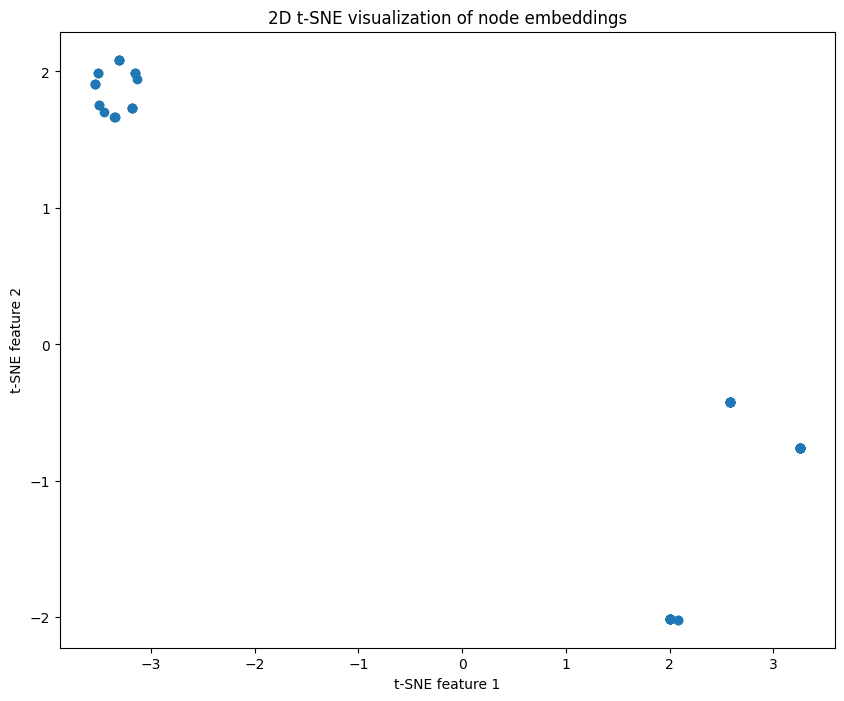

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select the embeddings of the first graph
embeddings = all_embeddings[0]  # Assuming you want to visualize the first graph

# Use t-SNE to reduce the dimensionality of the embeddings to 2D for visualization
tsne = TSNE(n_components=2, random_state=123)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the resulting 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('2D t-SNE visualization of node embeddings')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [ ]:
# Assuming all_embeddings contains the embeddings for each graph corresponding to each row in the dataframe

# Convert each set of embeddings to a single averaged embedding
averaged_embeddings = [embeddings.mean(axis=0) for embeddings in all_embeddings]

# Convert the list of averaged embeddings into a format that can be added to the dataframe
# This will be a list of lists (or numpy arrays), where each sublist is the averaged embedding for a protein
df['Embeddings'] = averaged_embeddings

# Now, each row in df has an 'Embeddings' column containing the averaged node embeddings


In [ ]:
#dont forget to combine this to the paired_df
df

,File Name,Sequence,C-alpha Coordinates,Parsed Coordinates,Normalized Coordinates,pair_id,tokenized_sequence,tokenized_sequence_with_sep,coordinates_list,formatted_coordinates,Embeddings
0,1H0J_A.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,47.873 32.351 21.457 46.719 29.304 23.415 43.0...,"[(47.873, 32.351, 21.457), (46.719, 29.304, 23...","[(0.6679325782836384, 0.23438756237169914, -0....",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[47.873, 32.351, 21.457, 46.719, 29.304, 23.41...","47.873, 32.351, 21.457, 46.719, 29.304, 23.415...","[-0.022567311, -0.064437225, -0.14048475, -0.0..."
1,1H0J_B.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,15.18 27.908 -3.171 13.094 28.367 -0.025 14.19...,"[(15.18, 27.908, -3.171), (13.094, 28.367, -0....","[(-0.35319108263321614, 0.09634337541879658, -...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[15.18, 27.908, -3.171, 13.094, 28.367, -0.025...","15.18, 27.908, -3.171, 13.094, 28.367, -0.025,...","[-0.060356356, -0.027628826, -0.10811642, -0.0..."
2,1H0J_C.pdb,LKCNKLVPLFYKTCPAGKNLCYKMFMVATPKVPVKRGCIDVCPKSS...,31.71 11.761 52.412 31.514 9.193 49.625 29.806...,"[(31.71, 11.761, 52.412), (31.514, 9.193, 49.6...","[(0.1631021334973197, -0.4053445576733752, 0.3...",1H0J,"[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[10, 9, 2, 12, 9, 10, 18, 13, 10, 5, 20, 9, 17...","[31.71, 11.761, 52.412, 31.514, 9.193, 49.625,...","31.71, 11.761, 52.412, 31.514, 9.193, 49.625, ...","[-0.030470481, -0.045889217, -0.031704873, 0.0..."
3,1H11_A.pdb,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,73.26 43.305 7.402 72.522 41.084 10.454 69.297...,"[(73.26, 43.305, 7.402), (72.522, 41.084, 10.4...","[(1.4608627584352365, 0.574728778640458, -0.66...",1H11,"[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[16, 18, 18, 4, 4, 7, 6, 14, 10, 16, 8, 16, 12...","[73.26, 43.305, 7.402, 72.522, 41.084, 10.454,...","73.26, 43.305, 7.402, 72.522, 41.084, 10.454, ...","[-0.114110984, -0.1377845, -0.20146592, -0.110..."
5,1H1A_A.pdb,XTLTSSATGTHNGYYYSFWTDGQGNIRFNLESGGQYSVTWSGNGNW...,-1.391 21.605 15.29 1.068 24.346 14.392 4.547 ...,"[(-1.391, 21.605, 15.29), (1.068, 24.346, 14.3...","[(-0.8707648808485281, -0.09949108561297146, -...",1H1A,"[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[21, 17, 10, 17, 16, 16, 1, 17, 6, 17, 7, 12, ...","[-1.391, 21.605, 15.29, 1.068, 24.346, 14.392,...","-1.391, 21.605, 15.29, 1.068, 24.346, 14.392, ...","[-0.08183649, -0.014221526, -0.14868975, -0.06..."
...,...,...,...,...,...,...,...,...,...,...,...
1576,1JTP_M.pdb,KVYGRCELAAAMKRLGLDNYRGYSLGNWVCAAKFESNFNTHATNRN...,42.146 17.053 21.618 39.429 19.745 21.695 38.6...,"[(42.146, 17.053, 21.618), (39.429, 19.745, 21...","[(0.48905712463696105, -0.2409219069070549, -0...",1JTP,"[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[9, 18, 20, 6, 15, 2, 4, 10, 1, 1, 1, 11, 9, 1...","[42.146, 17.053, 21.618, 39.429, 19.745, 21.69...","42.146, 17.053, 21.618, 39.429, 19.745, 21.695...","[-0.05535981, -0.09288963, -0.14019401, -0.045..."
1577,1JU2_A.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,55.001 88.6 14.574 56.504 91.499 16.515 59.961...,"[(55.001, 88.6, 14.574), (56.504, 91.499, 16.5...","[(0.890566458778403, 1.9820462326201393, -0.49...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[55.001, 88.6, 14.574, 56.504, 91.499, 16.515,...","55.001, 88.6, 14.574, 56.504, 91.499, 16.515, ...","[-0.19729167, -0.11811975, -0.25194228, -0.201..."
1578,1JU2_B.pdb,LATTSDHDFSYLSFAYDATDLELEGSYDYVIVGGGTSGCPLAATLS...,40.038 49.943 89.754 43.795 49.568 90.105 46.1...,"[(40.038, 49.943, 89.754), (43.795, 49.568, 90...","[(0.42321646525382906, 0.7809717030143872, 1.2...",1JU2,"[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[10, 1, 17, 17, 16, 3, 7, 3, 5, 16, 20, 10, 16...","[40.038, 49.943, 89.754, 43.795, 49.568, 90.10...","40.

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class PPIDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Retrieve the tokenized sequences and structural embeddings for the protein pair
        # Assume 'tokenized_sequence_A_with_sep', 'tokenized_sequence_B_with_sep', and 'Embeddings' are columns
        sequence_A_tokens = self.dataframe.iloc[idx]['tokenized_sequence_A_with_sep']
        sequence_B_tokens = self.dataframe.iloc[idx]['tokenized_sequence_B_with_sep']
        embeddings_A = self.dataframe.iloc[idx]['Embeddings_A']  # Assuming these are the averaged embeddings per protein
        embeddings_B = self.dataframe.iloc[idx]['Embeddings_B']

        # Here you would concatenate the tokens with embeddings, prepare input IDs, attention masks, and token type IDs
        # This step is highly dependent on how you plan to integrate the embeddings with the tokenized sequences

        # Example placeholder for what might be returned, adjust according to your actual format
        input_ids = torch.tensor([0])  # Placeholder
        attention_mask = torch.tensor([0])  # Placeholder
        token_type_ids = torch.tensor([0])  # Placeholder

        return input_ids, attention_mask, token_type_ids

# Instantiate the dataset
ppi_dataset = PPIDataset(dataframe=paired_df, tokenizer=amino_acid_tokens, max_len=512)

# Create a DataLoader
dataloader = DataLoader(ppi_dataset, batch_size=32, shuffle=True)


In [ ]:
dataloader

In [ ]:
#PRACTICE